In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Loading and preparing the dataset**

In [2]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Splitting the dataset into 20% testing and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Implementation of Euclidean Distance**

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

**Find K-nearest neighbors**

In [7]:
def find_k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [(euclidean_distance(x_test, x_train), label) for x_train, label in zip(X_train, y_train)]

    k_nearest = sorted(distances, key=lambda x: x[0])[:k]

    return [label for _, label in k_nearest]

**Predict class based on voting**

In [6]:
def predict_class(X_train, y_train, x_test, k):
    k_neighbors = find_k_nearest_neighbors(X_train, y_train, x_test, k)

    most_common = Counter(k_neighbors).most_common(1)  # Returns [(label, count)]

    return most_common[0][0]

In [8]:
def knn_predict(X_train, y_train, X_test, k):
    return np.array([predict_class(X_train, y_train, x_test, k) for x_test in X_test])

**Train and test the KNN model**

In [12]:
k = 7

y_pred = knn_predict(X_train, y_train, X_test, k)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


**Visualize the classified data using PCA**

Since the dataset has 4 dimensions, here, we will use the PCA to reduce its dimension to 2.

The PCA (Principal Component Analysis) is a dimensionality reduction method that reduces the number of features in a dataset while preserving as much information as possible.

<ipython-input-15-3112bad94579>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[y_pred_pca == i, 0], X_test_pca[y_pred_pca == i, 1],


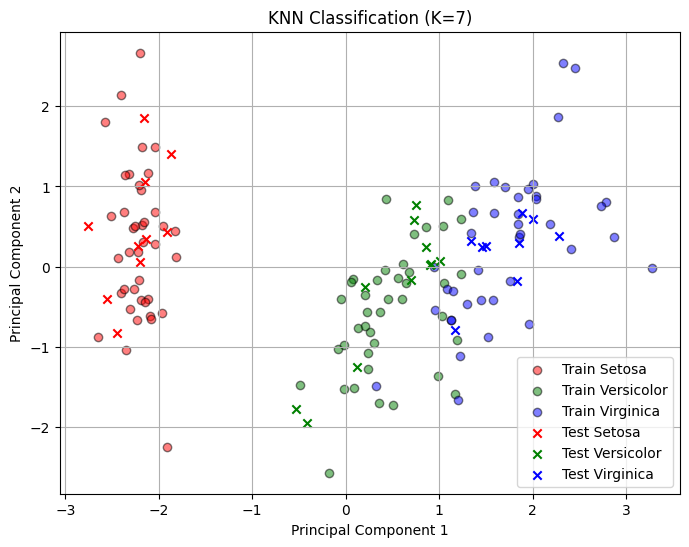

In [15]:
# Apply PCA to reduce the dataset to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

y_pred_pca = knn_predict(X_train_pca, y_train, X_test_pca, k)

colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(8, 6))

for i, label in enumerate(labels):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                color=colors[i], label=f"Train {label}", alpha=0.5, edgecolors='k')

for i, label in enumerate(labels):
    plt.scatter(X_test_pca[y_pred_pca == i, 0], X_test_pca[y_pred_pca == i, 1],
                color=colors[i], marker='x', label=f"Test {label}", edgecolors='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title(f"KNN Classification (K={k})")
plt.grid(True)
plt.show()